# Task: Simple RNN Model, with Sunspots Dataset

## Theory
Padding: $P = \frac{(F-1)}{2}$
## Recurrent Neural Network (RNN)
- A neural network with feedback connections.
- We can use RNN if there needs to be some memory component involved. The hidden state serves at its memory.
- Given $x_{t}$, we need to predict $x_{t+1}$.
- Across all timestamps, the same weights are used.
- For RNN, we use `Standard Squared Error` or `Standard absolute error`. IT's same as MSE except we don't consider the mean.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math # NEW: Use mathematical functions

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

In [ ]:
# Create an RNN
# This is an alternative way of creating a model. Instead of directly invoking the Sequential() class to create it, we have a function create it and return it for us.
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Model to demonstrate the working of RNN.
# 1. Build Model
demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

# the get_weights()[x] function gets the current (here initial) weights and bias of the model.
# Weights are outputted first.
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

# print(f'Input weight: {wx}') # 0
# print(f'Hidden layer weight: {wh}') # 1
# print(f'Hidden layer bias: {bh}') # 2
# print(f'Output weight: {wy}') # 3
# print(f'Output bias: {by}') #

x = np.array([1, 2, 3])
# Reshape to (sample_size x time_steps x number_of_features)
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)

m = 2
h0 = np.zeros(m) # Initial values are taken as (0,0)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)
print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
h1 =  [[-0.55075037  1.03798211]] h2 =  [[-2.22384826  2.42391366]] h3 =  [[-4.93826822  3.26543642]]
Prediction from network  [[5.4732666]]
Prediction from our computation  [[5.47326665]]


In [ ]:
# Functions
# Split the input data into training & test (train_split=0.8)
def get_train_test(url, split_percent=0.8):

    df = pd.read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    # fit & transform the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)

    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y: Reshape
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

# This has a different loss function, this is NOT meant for the model we used for our demo_model
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps: ')
    plt.ylabel('Sunspots scaled: ')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples.')
    plt.show()

In [ ]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [ ]:
# Create model and train
num_epochs=20
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=num_epochs, batch_size=1, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train RMSE: 0.064 RMSE
Test RMSE: 0.087 RMSE


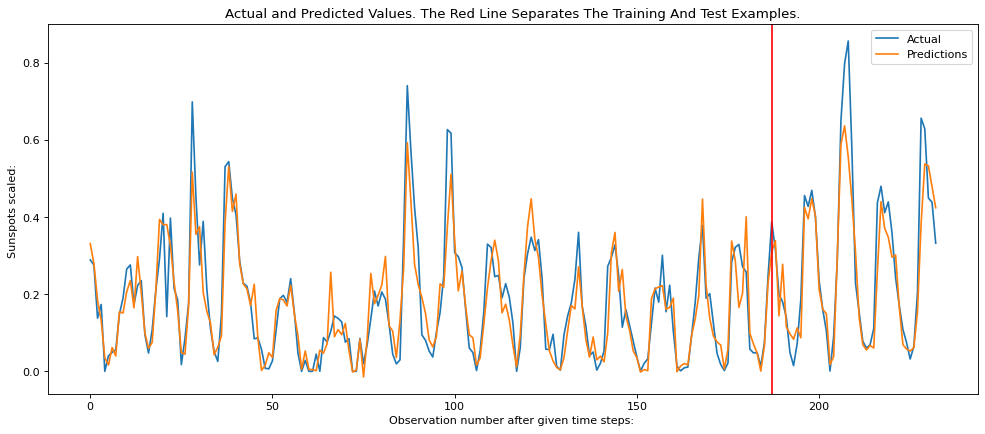

In [ ]:
# Predict, print results
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)

plot_result(trainY, testY, train_predict, test_predict)